In [5]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
VRUTTAMU= ["daasarathi", "srikaalahasteeswara", "vrushadhipa", "maaruthi", "bhaskara", "naarayana", "devakinandana", "venkateswara", "ontimittaraguveera",
           "bharga", "chiravibhava", "bhaktamandaara", "sarveswara", "sundariimani", "maathru"]

In [7]:
base_path= "c:\\Users\\bsnra\\Desktop\\chandassu\\dataset\\score"

satakam= []
chandassu_score= []
n_paadalu_score= []
n_aksharalu_score= []
gana_kramam_score= []
yati_sthanam_score= []
prasa_score= []

for i in VRUTTAMU:
    file_path= os.path.join( base_path, i+".xlsx")
    df= pd.read_excel( file_path )
    
    satakam.append(i)
    chandassu_score.append( df["chandassu_score"].mean() )
    n_paadalu_score.append( df["n_paadalu_score"].mean() )
    n_aksharalu_score.append( df["n_aksharalu_score"].mean() )
    gana_kramam_score.append( df["gana_kramam_score"].mean() )
    yati_sthanam_score.append( df["yati_sthanam_score"].mean() )
    prasa_score.append( df["prasa_score"].mean() )

    print(i)

daasarathi
srikaalahasteeswara
vrushadhipa
maaruthi
bhaskara
naarayana
devakinandana
venkateswara
ontimittaraguveera
bharga
chiravibhava
bhaktamandaara
sarveswara
sundariimani
maathru


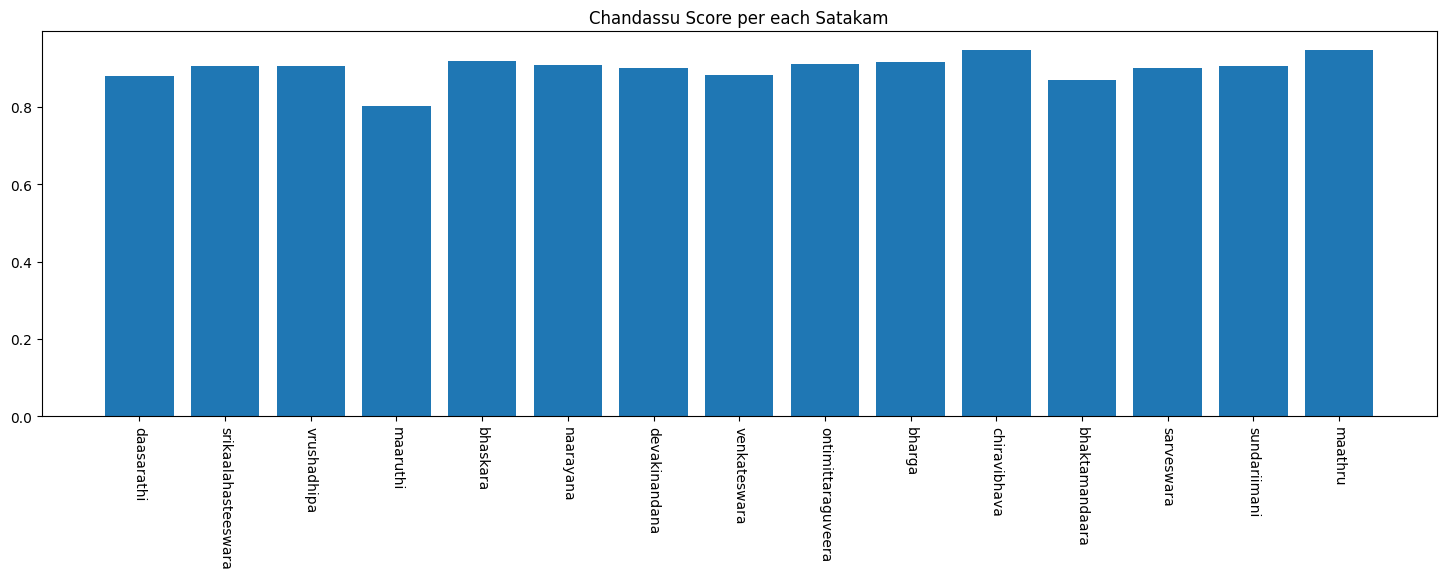

In [8]:
plt.figure( figsize= (18, 5) )
plt.bar( range(len(chandassu_score)), chandassu_score )
plt.xticks( range(len(satakam)), satakam, rotation= 270 )
plt.title( "Chandassu Score per each Satakam")
plt.show()

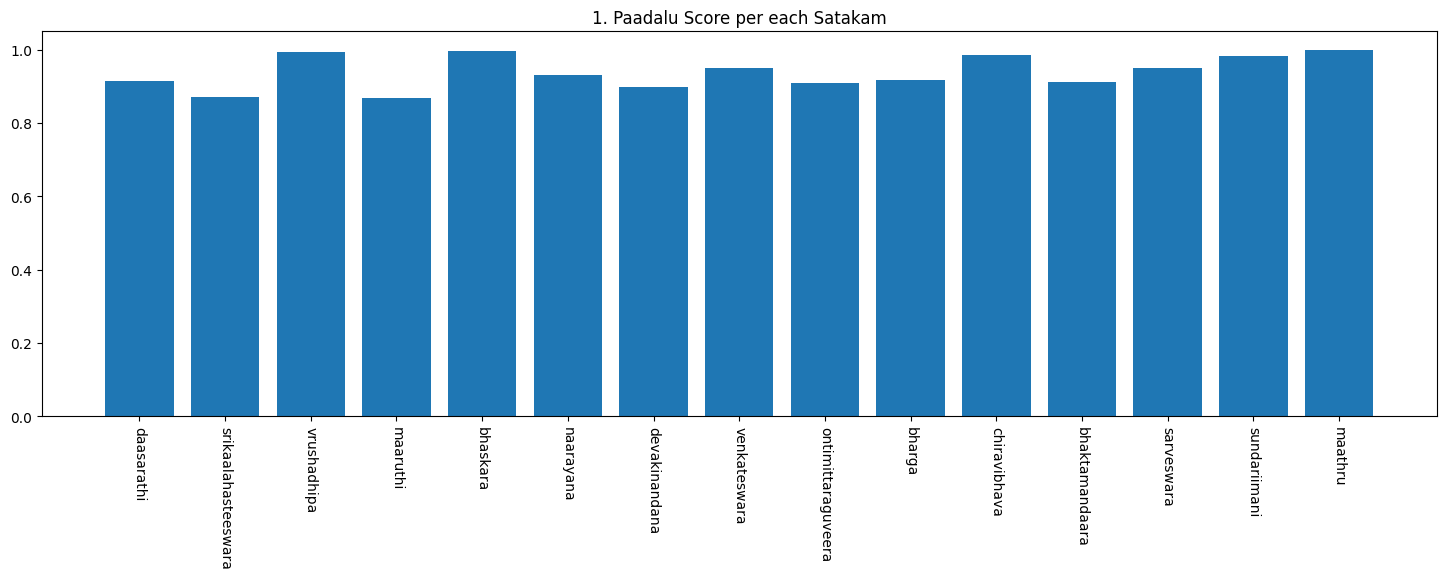

In [9]:
plt.figure( figsize= (18, 5) )
plt.bar( range(len(n_paadalu_score)), n_paadalu_score )
plt.xticks( range(len(satakam)), satakam, rotation= 270 )
plt.title( "1. Paadalu Score per each Satakam")
plt.show()

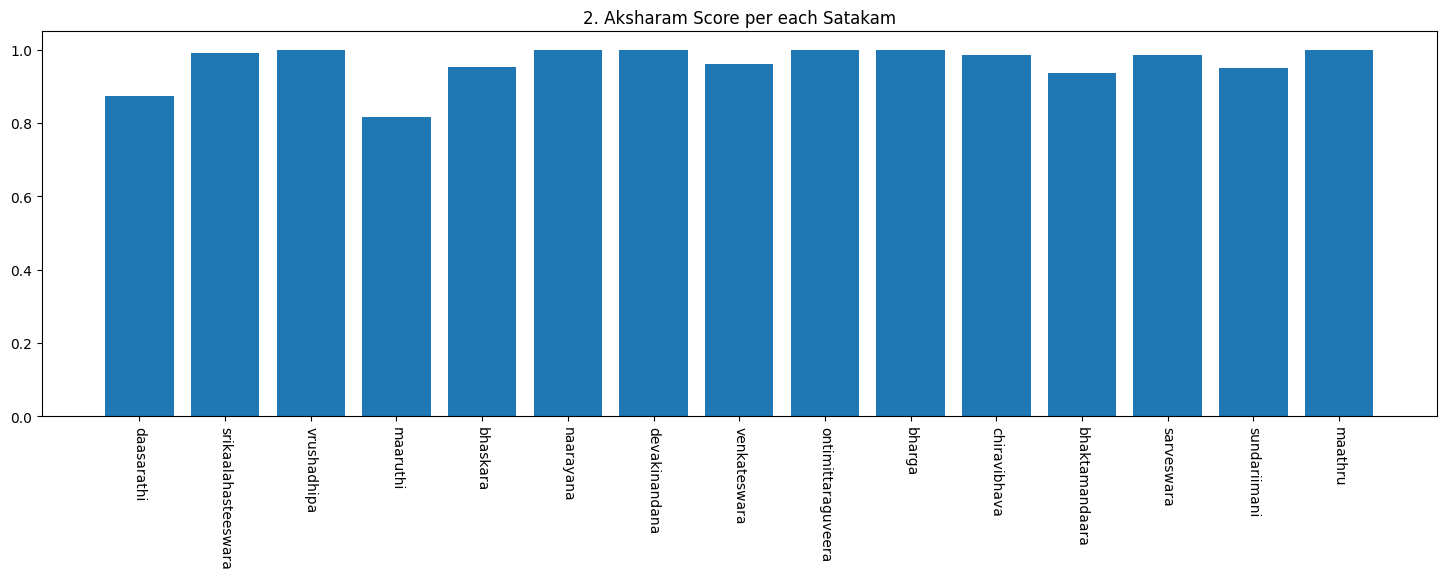

In [10]:
plt.figure( figsize= (18, 5) )
plt.bar( range(len(n_aksharalu_score)), n_aksharalu_score )
plt.xticks( range(len(satakam)), satakam, rotation= 270 )
plt.title( "2. Aksharam Score per each Satakam")
plt.show()

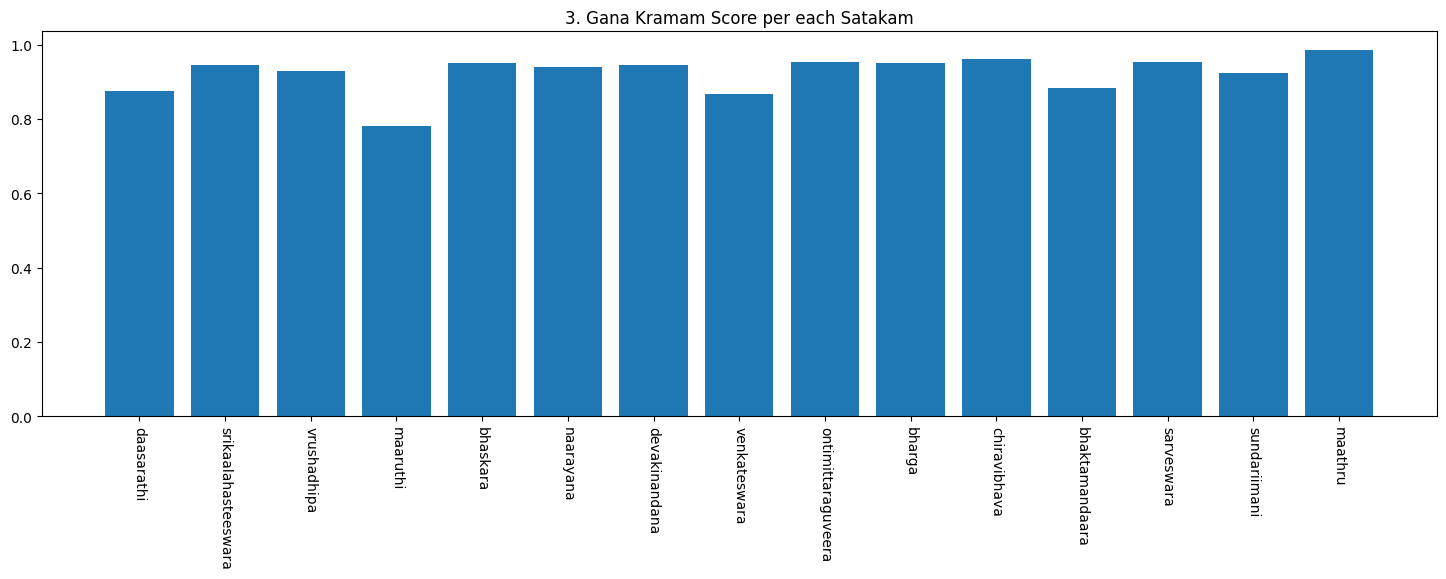

In [11]:
plt.figure( figsize= (18, 5) )
plt.bar( range(len(gana_kramam_score)), gana_kramam_score )
plt.xticks( range(len(satakam)), satakam, rotation= 270 )
plt.title( "3. Gana Kramam Score per each Satakam")
plt.show()

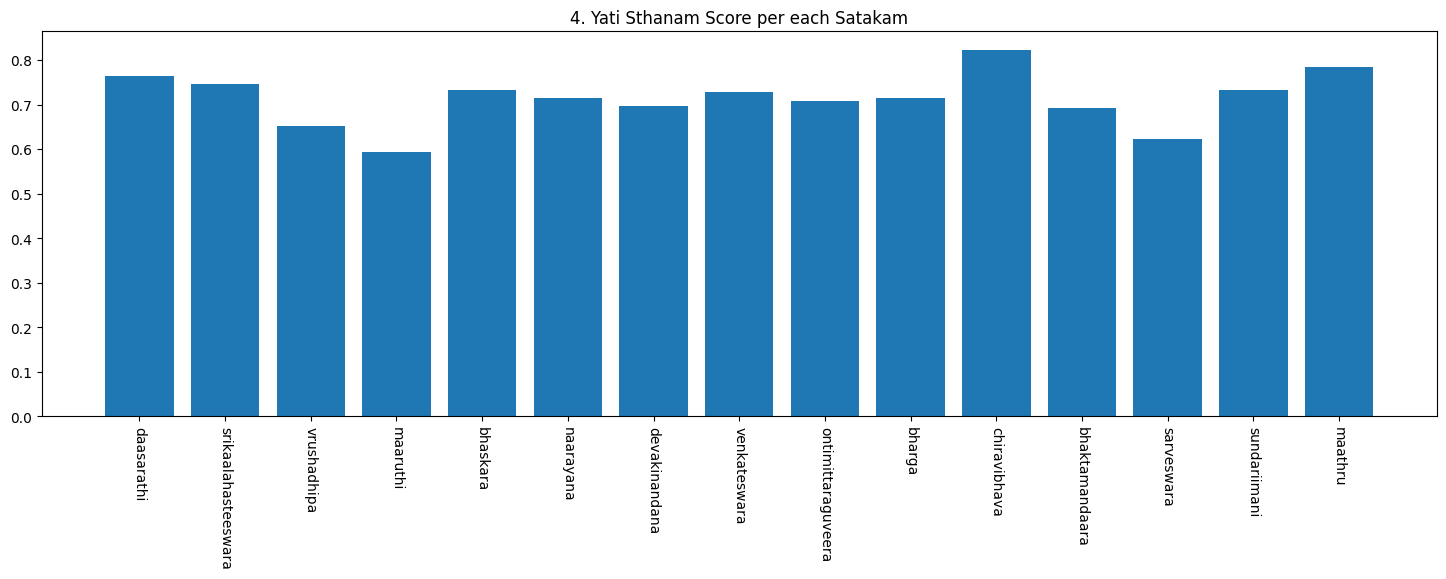

In [12]:
plt.figure( figsize= (18, 5) )
plt.bar( range(len(yati_sthanam_score)), yati_sthanam_score )
plt.xticks( range(len(satakam)), satakam, rotation= 270 )
plt.title( "4. Yati Sthanam Score per each Satakam")
plt.show()

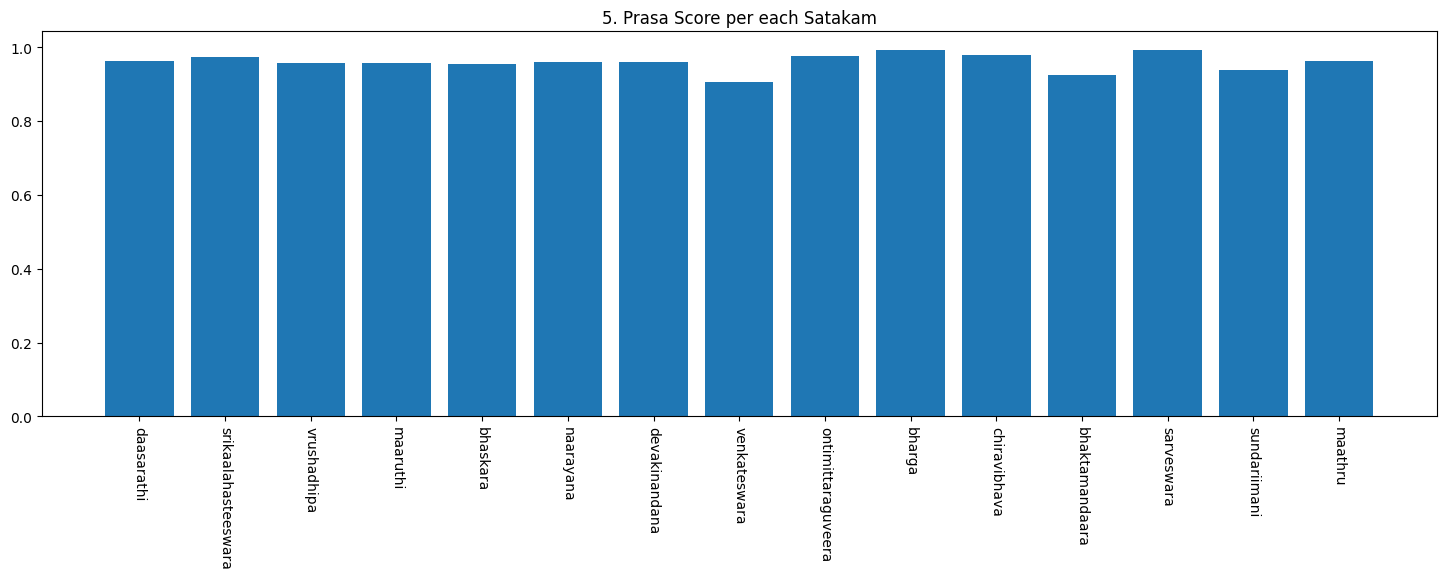

In [13]:
plt.figure( figsize= (18, 5) )
plt.bar( range(len(prasa_score)), prasa_score )
plt.xticks( range(len(satakam)), satakam, rotation= 270 )
plt.title( "5. Prasa Score per each Satakam")
plt.show()